In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal as signal

In [5]:
import audio2numpy as a2n
x,sr=a2n.audio_from_file("data/own.mp3")

x /= np.max(np.abs(x))

nperseg = 128
t = np.arange(len(x)) / sr

In [6]:
f_no_filt, t_no_filt, zxx = signal.stft(x, sr, nperseg=nperseg)
df = pd.DataFrame(np.abs(zxx), columns=t_no_filt, index=f_no_filt)

Text(0.5, 0, 'Time [sec]')

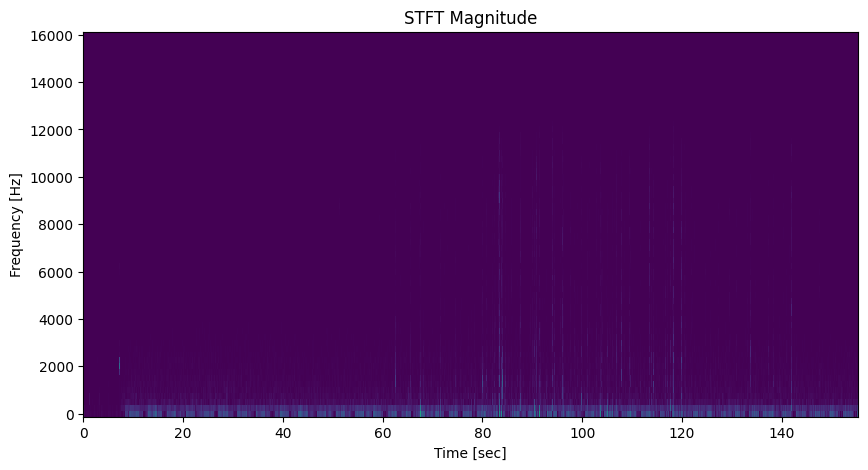

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.pcolormesh(df.columns, df.index, df)
ax.set_title('STFT Magnitude')
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [sec]')

Better CFAR used in [this](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=6132514) article by C.J. Venter et.al *Implementation of the CA-CFAR Algorithm for
Pulsed-Doppler Radar on a GPU Architecture*

Also check out [this](https://www.irjet.net/archives/V5/i7/IRJET-V5I7431.pdf)

In [17]:
f_interval = (1500, 3500)
butter = signal.butter(4, f_interval, btype='bandpass', fs=sr, output='sos')
x_filt = signal.sosfilt(butter, x)
f_filt, t_filt, zxx_filt = signal.stft(x_filt, sr, nperseg=nperseg)
df_filt = pd.DataFrame(np.abs(zxx_filt), columns=t_filt, index=f_filt)

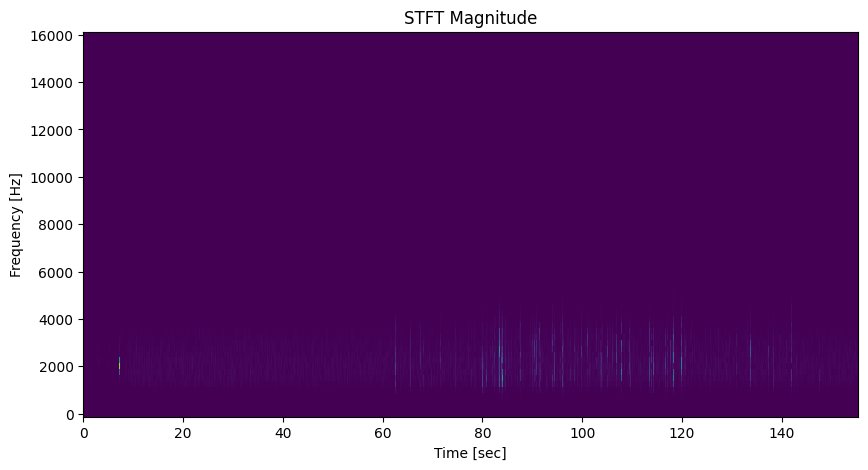

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.pcolormesh(df_filt.columns, df_filt.index, df_filt)
ax.set_title('STFT Magnitude')
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [sec]')
plt.show()

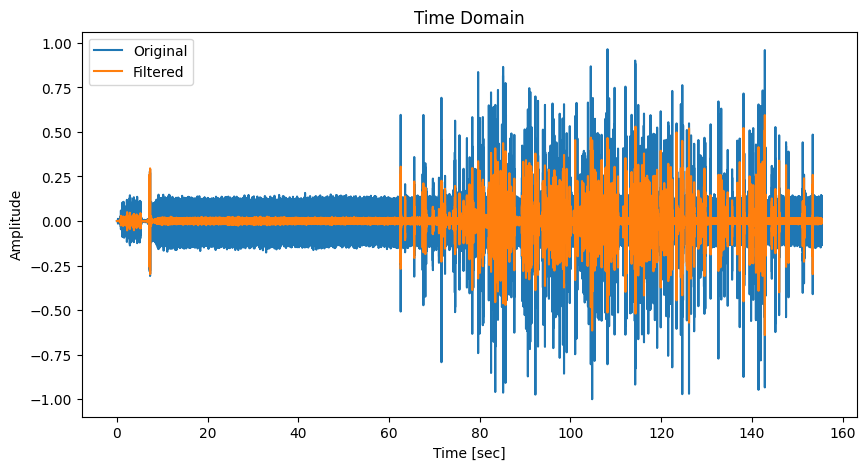

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(t, x, label='Original')
ax.plot(t, x_filt, label='Filtered')
ax.set_title('Time Domain')
ax.set_ylabel('Amplitude')
ax.set_xlabel('Time [sec]')
ax.legend()
plt.show()